# Data Augmentation

## Data Prep
Cloned from data preperation

In [1]:
%matplotlib inline
import sys
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from datetime import datetime
from IPython.core.display import display, HTML
import cv2
from PIL import Image
from pathlib import Path
import torchvision

from sklearn.model_selection import train_test_split

# repeatable functions housed in the utils file and imported here
from utils import *

In [2]:
## prepare dataset to add map to the location of the image file.  
## This format will be used in the DataLoader class that we can build to pass data to the model

df= pd.read_csv("annotations.csv")
df['filename']= "./images/" + df['filename']
df.to_csv('annotations_map.csv', index= False)
df.head()

filename  width  height  class  xmin  ymin  xmax  ymax
0   ./images/1.jpg   2048    1251  waldo   706   513   743   562
1  ./images/10.jpg   1600     980  waldo   715   157   733   181
2  ./images/11.jpg   2828    1828  waldo   460  1530   482  1557
3  ./images/12.jpg   1276    1754  waldo   846   517   878   563
4  ./images/13.jpg   1280     864  waldo   932   274   942   288

## Resize Images
Based on data_preperation.ipynb

In [3]:
#Populating Training DF with new paths and bounding boxes
new_paths = []
new_bbs = []
train_path_resized = Path('./images_resized/')
for index, row in df.iterrows():
    new_path,new_bb = resize_image_bb(row['filename'], train_path_resized, create_bb_array(row.values),500)
    new_paths.append(new_path)
    new_bbs.append(new_bb)
    
df['new_path'] = new_paths
df['new_bb'] = new_bbs
df.head()

filename  width  height  class  xmin  ymin  xmax  ymax  \
0   ./images/1.jpg   2048    1251  waldo   706   513   743   562   
1  ./images/10.jpg   1600     980  waldo   715   157   733   181   
2  ./images/11.jpg   2828    1828  waldo   460  1530   482  1557   
3  ./images/12.jpg   1276    1754  waldo   846   517   878   563   
4  ./images/13.jpg   1280     864  waldo   932   274   942   288   

                new_path                new_bb  
0   images_resized/1.jpg  [172, 205, 181, 225]  
1  images_resized/10.jpg    [223, 80, 229, 92]  
2  images_resized/11.jpg    [81, 418, 85, 426]  
3  images_resized/12.jpg  [332, 147, 344, 160]  
4  images_resized/13.jpg  [364, 159, 368, 167]

In [4]:
## Create New DF with only the new path and new bb

## New DF is df_traiin

resized_df_rows= []
for index, row in df.iterrows():
    img_size= cv2.imread(row['new_path']).shape
    row_bb= row['new_bb']
    resized_df_rows.append([row['new_path'], img_size[1], img_size[0],row['class'], row_bb[0], row_bb[1], row_bb[2], row_bb[3]])
df_train= pd.DataFrame(resized_df_rows)
df_train.columns= ['filename','width','height','class','xmin','ymin','xmax','ymax']
df_train.to_csv('annotations_map_resized.csv', index=False)
df_train.head()

filename  width  height  class  xmin  ymin  xmax  ymax
0   images_resized/1.jpg    500     500  waldo   172   205   181   225
1  images_resized/10.jpg    500     500  waldo   223    80   229    92
2  images_resized/11.jpg    500     500  waldo    81   418    85   426
3  images_resized/12.jpg    500     500  waldo   332   147   344   160
4  images_resized/13.jpg    500     500  waldo   364   159   368   167

In [ ]:
### Save the annotated base images
Saves to the images_annotated folder 

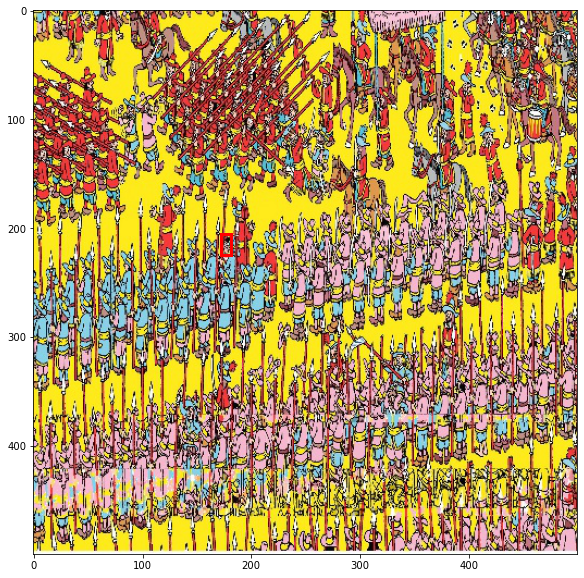

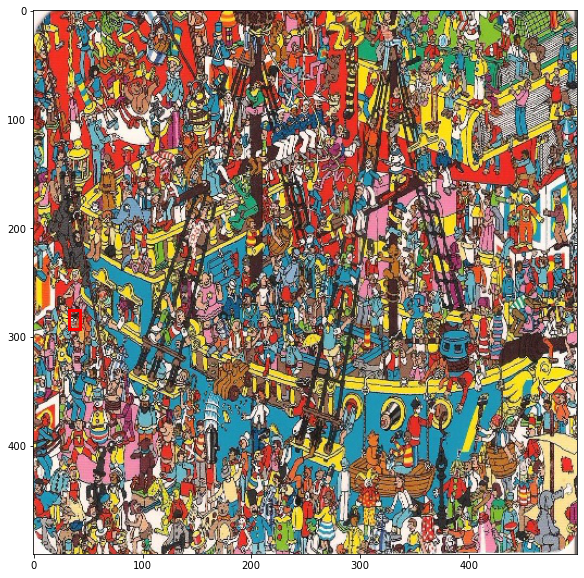

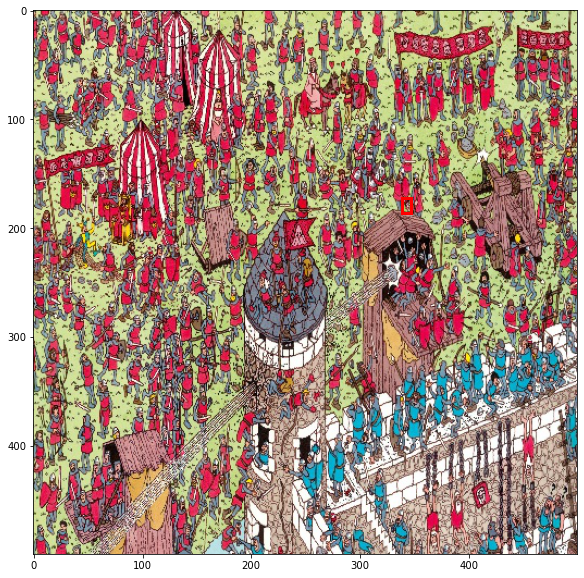

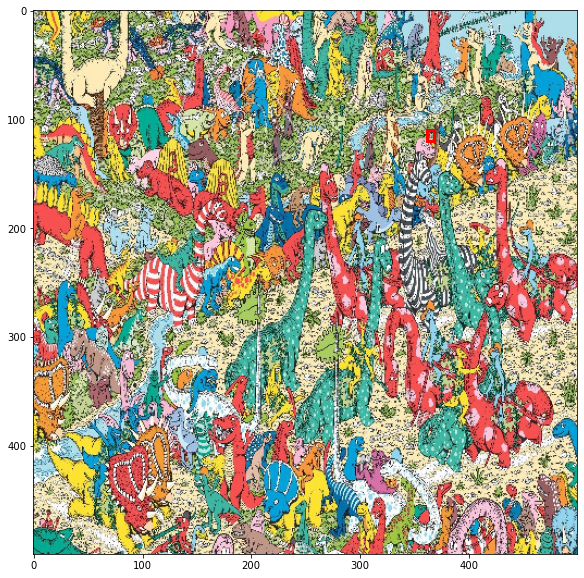

Error in callback <function flush_figures at 0x7fa80d46c820> (for post_execute):


KeyboardInterrupt: 

In [26]:
base_image_count = 36
for img_num in range(1,base_image_count):
    save_annotated_images(str(img_num), annotations_path='annotations_map_resized.csv', images_path='./images_resized/')

In [ ]:
## Augment the annotated base images
Augmentation ideas ref: https://iq.opengenus.org/data-augmentation/
Cannot do crop or translation due to concerns of removing Waldo.
Scaling is kind of useless since the images are reshaped anyway.

### Flipping

### Padding

### Rotation

### Brightness

### Contrast

### Saturation

### Hue

### Grayscale

In [ ]:
Not doing this as part of the main goal, but an additional stretch objective could be implementing a generative adversarial network.